In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions import *

# Testing

In [2]:
N = 6
K = 4
CF = 2.**(-7)
start = -1.
end = 1.
a = 1.
alpha = 1./2.
h = (end-start)/K
t = 0.


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h


In [15]:
def initial_condition_1(x,t):
    #return np.exp(-2*np.cos(2*np.pi*(x-t)))
    return np.sin(4*np.pi*x)

In [16]:
x = get_x_elements(start,end, K, reference_interval)
u = initial_condition_1(x,t)

In [17]:
dx_min = get_dx_min(x)
dt = CF*dx_min

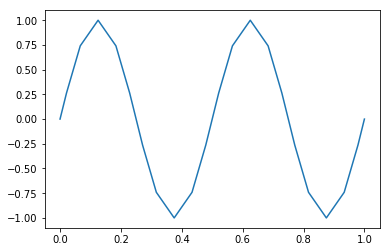

In [18]:
plt.plot(x.flatten(), u.flatten())

In [19]:
derivative_0 = DG_du_dt(u, K, N, t, a,alpha,M_inv, M_inv_S)

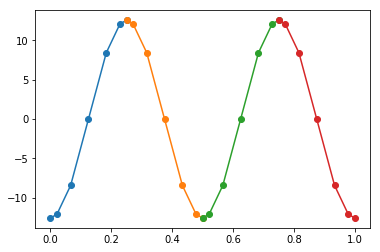

In [20]:
for i in range(len(derivative_0)):
    plt.plot(x[i],derivative_0[i],marker ='o')

In [9]:
T_final = 0.3
nt = int((T_final-t)/dt)

In [10]:
for n in range(nt):

        u = RK4_Step(dt,DG_du_dt,u, K,N,t,a,alpha,M_inv, M_inv_S)
        t = t + dt

In [11]:
t

0.2999267301094523

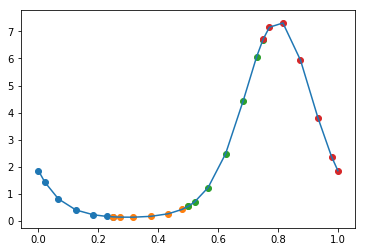

In [12]:
for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
plt.plot(x.flatten(), initial_condition_1(x,t).flatten())

# Big function test

In [13]:
t, u, x = Evolve(0.,1., RK4_Step,DG_du_dt,2.**(-7),0.,1.,initial_condition_1,4,6,1.,1./2.)

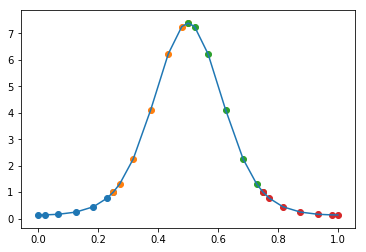

In [14]:
for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
plt.plot(x.flatten(), initial_condition_1(x,t).flatten())

# Convergence Test

In [52]:
K_range = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
N_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
t_final = 0.3
X,Y = np.meshgrid(K_range,N_range)
Z = np.zeros((len(N_range),len(K_range)))

In [55]:
for j in range(len(N_range)):
    for i in range(len(K_range)):
        evolved = Evolve(0.,0.3,RK4_Step,DG_du_dt,2.**(-7),0.,1.,initial_condition_1,K_range[i],N_range[j],1.,1./2.)
        numerical_middle = evolved[1][int(K_range[i]//2)][0]
        analytical_middle = initial_condition_1(0.5,evolved[0])
        Z[j][i] = np.abs((numerical_middle - analytical_middle)/analytical_middle)

KeyboardInterrupt: 

C:\Users\Nhat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, 'N')

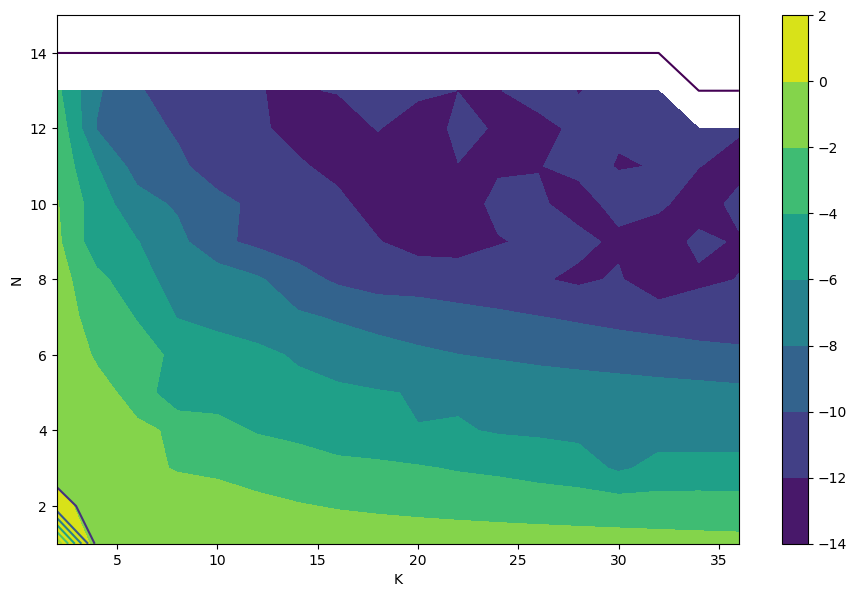

In [75]:
plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X,Y,np.log10(Z),alpha = 1,cmap=cm.viridis)
plt.colorbar()
plt.contour(X,Y,Z, cmap = cm.viridis)
plt.xlabel('K')
plt.ylabel('N')

C:\Users\Nhat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


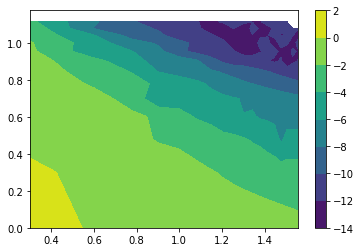

In [64]:
plt.contourf(np.log10(X),np.log10(Y),np.log10(Z), cmap =cm.viridis)
plt.colorbar()

In [80]:
print(Z.shape)
Z

(15, 18)


array([[6.70632959e+00, 6.41458280e-01, 5.69179138e-01, 1.46998045e-01,
        2.04374663e-02, 7.96122888e-02, 1.04539992e-01, 1.07879120e-01,
        1.02418102e-01, 9.29027407e-02, 8.31367333e-02, 7.36286285e-02,
        6.49101243e-02, 5.71593045e-02, 5.03828817e-02, 4.44264705e-02,
        3.93779265e-02, 3.50239607e-02],
       [1.26475562e+00, 7.10384722e-01, 8.47358857e-02, 1.22901632e-01,
        6.68840457e-02, 2.66342653e-02, 1.27152446e-02, 7.66738687e-03,
        5.19572504e-03, 3.71791839e-03, 2.75526193e-03, 2.09774291e-03,
        1.63384239e-03, 1.29841209e-03, 1.04913955e-03, 8.59648311e-04,
        7.13547880e-04, 5.98629364e-04],
       [7.31076114e-01, 2.23463616e-01, 2.92161986e-02, 7.44388299e-03,
        4.51825262e-03, 1.86133946e-03, 1.00605207e-03, 5.26843948e-04,
        2.61734205e-04, 1.54019559e-04, 7.07581029e-05, 4.09344629e-05,
        1.59209213e-05, 6.37315471e-06, 5.23248323e-07, 3.43959825e-06,
        5.07596211e-06, 5.61402108e-06],
       [1.678

In [53]:
#original convergence test
"""for N in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    error_in_middle = []
    for K in K_range:
        evolved = Evolve(0.,0.3,RK4_Step,2.**(-7),0.,1.,initial_condition_1,K,N,1.,1./2.)
        numerical_middle = evolved[1][int(K//2)][0]
        analytical_middle = initial_condition_1(0.5,evolved[0])
        error = np.abs((numerical_middle - analytical_middle)/analytical_middle)
        error_in_middle.append(np.log10(error))
    plt.plot(np.log10(K_range),error_in_middle, label = 'N = '+str(N), marker ='o')
plt.legend()"""

"for N in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:\n    error_in_middle = []\n    for K in K_range:\n        evolved = Evolve(0.,0.3,RK4_Step,2.**(-7),0.,1.,initial_condition_1,K,N,1.,1./2.)\n        numerical_middle = evolved[1][int(K//2)][0]\n        analytical_middle = initial_condition_1(0.5,evolved[0])\n        error = np.abs((numerical_middle - analytical_middle)/analytical_middle)\n        error_in_middle.append(np.log10(error))\n    plt.plot(np.log10(K_range),error_in_middle, label = 'N = '+str(N), marker ='o')\nplt.legend()"

In [44]:
x = np.linspace(0,10,11)
y = np.linspace(0,20,21)
X,Y = np.meshgrid(x,y)

In [45]:
z = np.zeros((len(y),len(x)))

In [49]:
for j in range(len(y)):
    for i in range(len(x)):
        z[j][i]= y[j]+x[i]

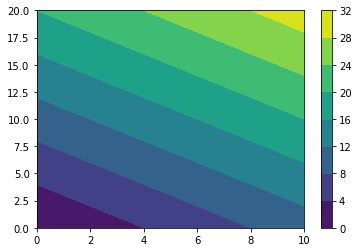

In [50]:
plt.contourf(X, Y, z, cmap=cm.viridis)  
plt.colorbar()

# Radiative BCs without source term
Changes made: disconnect the leftmost and rightmost element

In [15]:
t, u, x = Evolve(0.,1., RK4_Step,DG_du_dt_radiative,2.**(-7),0.,1.,initial_condition_1,4,6,-1.,1./2.)

TypeError: 'NoneType' object is not callable

0.9999215640078957


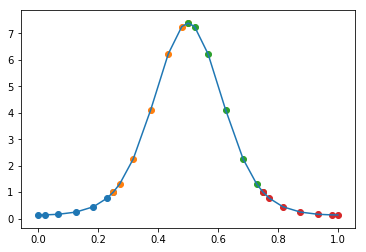

In [16]:
print(t)
for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
plt.plot(x.flatten(), initial_condition_1(x,t).flatten())

In [17]:
def zero_initial_condition(x,t):
    return 0*x

In [18]:
#source term  = sin(10*pi*t)* delta(x) 

In [19]:
True& False

False

In [20]:
def g(t):
    return np.sin(5*np.pi*t)

In [21]:
t, u, x = Evolve(0.,0.5, RK4_Step,DG_du_dt_radiative,2.**(-7),0.,1.,zero_initial_condition,4,6,1.,1./2.,g)

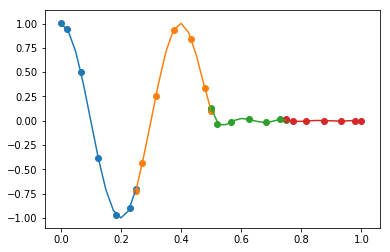

In [22]:
interpolated_plot(u,x,11)

In [2]:
a = ReferenceElement(4)

In [24]:
a[2][:,0]

array([-5.        , -1.24099025,  0.375     , -0.25900975,  0.5       ])

In [6]:
a[1].shape

(5, 5)